In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob


PATH_TO_DATA = '/home/lgierz/BA_MothClassification/data/'
PATH_TO_CA = PATH_TO_DATA + 'confidence_analysis/'

model_names = ["Linear Classifier", "KNN"]
fm_names = ['resnet', 'dino']

dataset_configs = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}


PATH_TO_IMAGES = '/mnt/data/lgierz/moth_dataset_top589_max3000/'
PATH_TO_LABELS = PATH_TO_DATA + 'processed/dataset_top589_max3000.csv'
PATH_TO_CORRECTED_CONFS = PATH_TO_CA + 'results/all_results_corrected_labels_w_scores.csv'

labels_csv = pd.read_csv(PATH_TO_LABELS)
confidences_csv = pd.read_csv(PATH_TO_CORRECTED_CONFS)

# create real mapping for labels_csv
species = labels_csv['scientificName']
unique_species = sorted(species.unique())
species_mapping = {species: idx for idx, species in enumerate(unique_species)}

print(unique_species)
print(species_mapping)
print(len(unique_species))

['Abraxas grossulariata', 'Abraxas sylvata', 'Abrostola triplasia', 'Acasis viretata', 'Acentria ephemerella', 'Acleris forsskaleana', 'Acleris notana/ferrugana', 'Acleris variegana', 'Acontia lucida', 'Acontia trabealis', 'Acrobasis advenella', 'Acrobasis repandana', 'Acrobasis tumidana', 'Acronicta aceris', 'Acronicta leporina', 'Acronicta rumicis', 'Acronicta tridens / psi', 'Adela reaumurella', 'Adscita statices', 'Aethalura punctulata', 'Agapeta hamana', 'Agapeta zoegana', 'Aglais io', 'Aglais urticae', 'Aglossa pinguinalis', 'Agonopterix arenella', 'Agonopterix heracliana / ciliella', 'Agriopis aurantiaria', 'Agriopis leucophaearia', 'Agriopis marginaria', 'Agriphila geniculea', 'Agriphila inquinatella', 'Agriphila selasella', 'Agriphila straminella', 'Agriphila tristella', 'Agrius convolvuli', 'Agrochola circellaris', 'Agrochola lota', 'Agrochola lunosa', 'Agrochola lychnidis', 'Agrochola macilenta', 'Agrotis clavis', 'Agrotis exclamationis', 'Agrotis ipsilon', 'Agrotis puta', '

In [1]:
# Check if any species names contain the string 'spec.'
contains_spec = [spec for spec in unique_species if 'spec.' in spec]
print(len(contains_spec), contains_spec)

NameError: name 'unique_species' is not defined

In [ ]:
# check how many of those clusters exist
overall_count = 0
for spec in contains_spec:
    genus = spec.split(' ')[0]
    subspecies = [name for name in unique_species if genus in name]
    print(genus, len(subspecies), subspecies)
    overall_count += len(subspecies)
print(f'In total {overall_count} species belong to a cluster')


Amphipoea 1 ['Amphipoea spec.']
Cnephasia 1 ['Cnephasia spec.']
Coleophora 1 ['Coleophora spec.']
Epirrita 1 ['Epirrita spec.']
Eupithecia 10 ['Eupithecia abbreviata', 'Eupithecia centaureata', 'Eupithecia intricata', 'Eupithecia inturbata', 'Eupithecia nanata', 'Eupithecia oxycedrata', 'Eupithecia spec.', 'Eupithecia tantillaria', 'Eupithecia tripunctaria', 'Eupithecia vulgata']
Idaea 11 ['Idaea aversata', 'Idaea biselata', 'Idaea degeneraria', 'Idaea dimidiata', 'Idaea emarginata', 'Idaea fuscovenosa', 'Idaea ochrata', 'Idaea rusticata', 'Idaea seriata', 'Idaea spec.', 'Idaea subsericeata']
Oligia 3 ['Oligia fasciuncula', 'Oligia spec.', 'Oligia strigilis']
Parornix 1 ['Parornix spec.']
Pyrgus 3 ['Pyrgus malvae', 'Pyrgus malvoides', 'Pyrgus spec.']
Yponomeuta 3 ['Yponomeuta evonymella', 'Yponomeuta plumbella', 'Yponomeuta spec.']
In total 35 species belong to a cluster


In [ ]:
all_geni = [spec.split(' ')[0] for spec in unique_species]
unique_geni = sorted(all_geni)
all_geni_series = pd.Series(all_geni)
value_counts = all_geni_series.value_counts()
groups_with_more_than_one = value_counts[value_counts > 1]
print(groups_with_more_than_one.sum())
genera_with_more_than_one = groups_with_more_than_one.keys()


288


### How much percent of wrong classification belong to a cluster? what could be the optimal accuracy with a better curated dataset? just leave out the 30

In [ ]:

def show_sample_by_id(gbifid, conf_csv):

    # Find the image file
    image_files = glob.glob(PATH_TO_IMAGES + f"{gbifid}_*.jpg")
    if not image_files:
        print(f"No image found for GBIF ID {gbifid}")
        return
    
    image_path = image_files[0]
    image = plt.imread(image_path)

    info_text = ""

    rows = conf_csv[conf_csv['GbifID'] == gbifid]

    for idx, row in rows.iterrows():
    
        # serach in labels csv for the scientific name
        accuracy = row['Accuracy']
        species = row['Species']
        samples = row['Samples']
        fm = row['FoundationalModel']
        model = row['Model']
        species_num = row['Label']
        species_str = list(species_mapping.keys())[species_num]
        
        predicted_species_num = row['PredictedLabel']
        predicted_species_str = list(species_mapping.keys())[predicted_species_num]
        confidences = [(i,round(x, 4)) for i,x in eval(row['Confidence'])[0:5]]

        info_text += f"top{species}max{samples} / {fm.upper()}-{model} / Accuracy: {round(accuracy*100, 2)}%\n" \
            f"GbifID: {gbifid} | Filename: {image_path.split('/')[-1]}\n" \
            f"Labeled: {species_num}, {species_str}\n" \
            f"Predicted: {predicted_species_num}, {predicted_species_str}\n" \
            f"confidences: {confidences}\n\n"

        # print(f'Confidences for top{species}max{samples} / {fm.upper()}-{model}:')
        # print(confidences) 
    print(species_str, image_path.split('/')[-1])

    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')  # Turn off the axis

    # Adding the text box
    props = dict(boxstyle='square', facecolor='lightblue', alpha=0.5)
    plt.text(1.03, 0.8, info_text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

    plt.show()
    plt.pause(0.001)  

def get_gbifids_for_class(class_num, conf_csv, count=5):
    return list(conf_csv[conf_csv['Label'] == class_num]['GbifID'].head(count))




In [ ]:
get_gbifids_for_class(256, confidences_csv, 3)

[4883241740, 4891379765, 4883139980]

Falcaria lacertinaria 4880963154_87280573.jpg


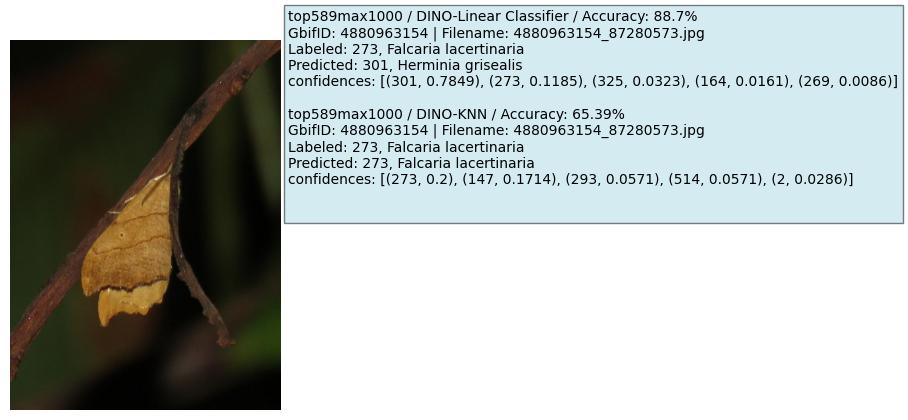

In [ ]:
show_sample_by_id(4880963154, confidences_csv)

### Amount of samples which share the same gbifid

In [ ]:
counts = list(confidences_csv['GbifID'].value_counts().values)
print('GbifIDs, Amount of Samples')
for x in range(1,33):
    a = counts.count(x)
    if a != 0:
        print(x,'\t', a)

GbifIDs, Amount of Samples
2 	 1171
4 	 374590
6 	 331
8 	 122863
10 	 99
12 	 41276
14 	 24
16 	 11603
18 	 1
20 	 2572
24 	 411
28 	 50
32 	 3


In [ ]:
# print# Get the GbifIDs that occur x times
times = 32
amount = 5
gbifids_x_times = confidences_csv['GbifID'].value_counts()[confidences_csv['GbifID'].value_counts() == times].index[:amount]
print(f"Three GbifIDs that occur {times} times in the dataset: {gbifids_x_times.values}")



Three GbifIDs that occur 32 times in the dataset: [3732669603 1959857478 4056154845]


##### Prep columns for mean Confidences

In [ ]:
confidences_csv['Top1_Confidence'] = confidences_csv['Confidence'].apply(lambda x: eval(x)[0][1])

In [ ]:
confidences_csv['Top2_Confidence'] = confidences_csv['Confidence'].apply(lambda x: eval(x)[1][1])

In [ ]:
confidences_csv['Confidence_Gap'] = confidences_csv['Top1_Confidence'] - confidences_csv['Top2_Confidence']

### Mean Top-1 Confidence

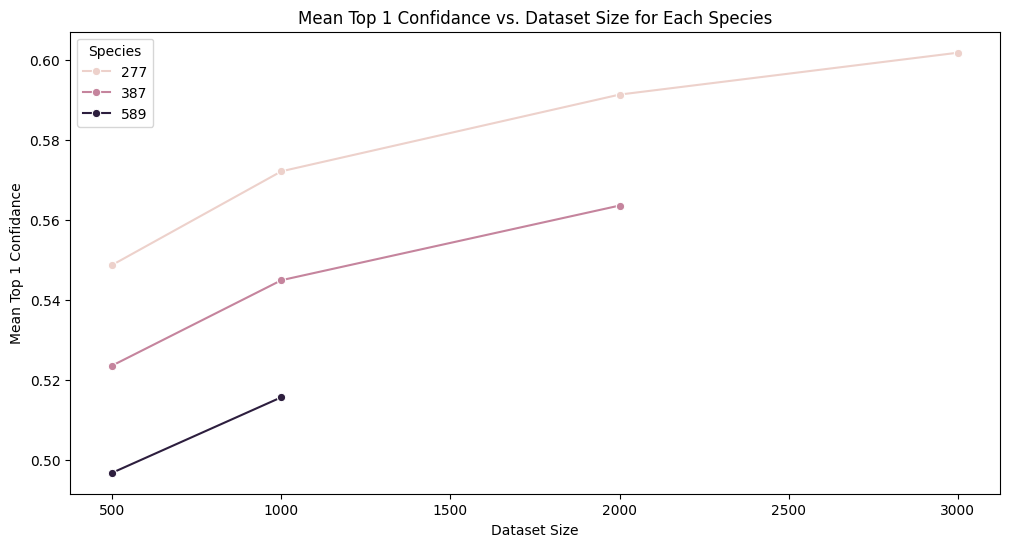

Species  Samples  Top1_Confidence
0      277     3000         0.601768
1      277     2000         0.591304
2      277     1000         0.572129
3      387     2000         0.563568
4      277      500         0.548733
5      387     1000         0.544907
6      387      500         0.523584
7      589     1000         0.515652
8      589      500         0.496787

In [ ]:
mean_top1_confidences = confidences_csv.groupby(['Species', 'Samples'])['Top1_Confidence'].mean().reset_index()

# Plot species and sample size vs. mean confidence gap
plt.figure(figsize=(12, 6))
sns.lineplot(x='Samples', y='Top1_Confidence', hue='Species', data=mean_top1_confidences, marker='o')
plt.title('Mean Top 1 Confidance vs. Dataset Size for Each Species')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Top 1 Confidance')
plt.legend(title='Species')
plt.show()

mean_top1_confidences.sort_values(by='Top1_Confidence',ascending=False).reset_index(drop=True)


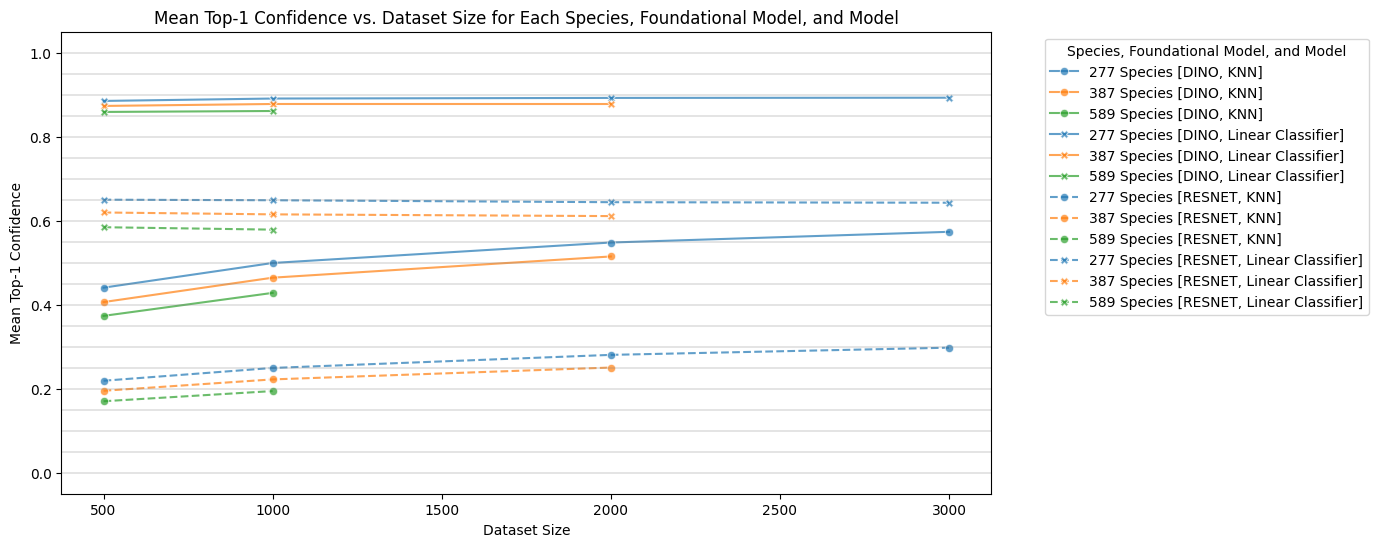

Species  Samples FoundationalModel              Model  Top1_Confidence
0       277     3000              dino  Linear Classifier         0.892917
1       277     2000              dino  Linear Classifier         0.892408
2       277     1000              dino  Linear Classifier         0.890918
3       277      500              dino  Linear Classifier         0.885221
4       387     1000              dino  Linear Classifier         0.877932
5       387     2000              dino  Linear Classifier         0.877897
6       387      500              dino  Linear Classifier         0.873313
7       589     1000              dino  Linear Classifier         0.861244
8       589      500              dino  Linear Classifier         0.859005
9       277      500            resnet  Linear Classifier         0.650068
10      277     1000            resnet  Linear Classifier         0.648753
11      277     2000            resnet  Linear Classifier         0.644120
12      277     3000            resnet  Linear Classifier         0.642855
13      387      500            resnet  Linear Classifier         0.619618
14      387     1000            resnet  Linear Classifier         0.615143
15      387     2000            resnet  Linear Classifier         0.611031
16      589      500            resnet  Linear Classifier         0.584528
17      589     1000            resnet  Linear Classifier         0.578760
18      277     3000              dino                KNN         0.573586
19      277     2000              dino                KNN         0.548093
20      387     2000              dino                KNN         0.514901
21      277     1000              dino                KNN         0.499392
22      387     1000              dino                KNN         0.464371
23      277      500              dino                KNN         0.440626
24      589     1000              dino                KNN         0.428188
25      387      500              dino                KNN         0.406294
26      589      500              dino                KNN         0.373431
27      277     3000            resnet                KNN         0.297716
28      277     2000            resnet                KNN         0.280594
29      387     2000            resnet                KNN         0.250441
30      277     1000            resnet                KNN         0.249452
31      387     1000            resnet                KNN         0.222181
32      277      500            resnet                KNN         0.219017
33      387      500            resnet                KNN         0.195110
34      589     1000            resnet                KNN         0.194417
35      589      500            resnet                KNN         0.170185

In [ ]:
import warnings

warnings.filterwarnings('ignore')

mean_top1_confidences = confidences_csv.groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Top1_Confidence'].mean().reset_index()

# Define markers for each combination of foundational model and model
markers = {
    ('dino', 'KNN'): ('o', '-'),
    ('dino', 'Linear Classifier'): ('X', '-'),
    ('resnet', 'KNN'): ('o','--'),
    ('resnet', 'Linear Classifier'): ('X', '--')
}

# Define a high contrast color palette
palette = sns.color_palette("tab10")

# Create a dictionary to store colors for each species
species_colors = {species: palette[i % len(palette)] for i, species in enumerate(mean_top1_confidences['Species'].unique())}

# Plot species, sample size, foundational model, and model vs. mean top-1 confidence
plt.figure(figsize=(12, 6))
for (fm, model), (marker, linestyle) in markers.items():
    subset = mean_top1_confidences[(mean_top1_confidences['FoundationalModel'] == fm) & (mean_top1_confidences['Model'] == model)]
    for species in subset['Species'].unique():
        species_subset = subset[subset['Species'] == species]
        label = f"{species} Species [{fm.upper()}, {model}]"
        sns.lineplot(x='Samples', y='Top1_Confidence', data=species_subset, marker=marker, linestyle=linestyle, color=species_colors[species], alpha=0.7, label=label)

# Add horizontal lines
for y in range(0, 101, 5):
    plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)

plt.title('Mean Top-1 Confidence vs. Dataset Size for Each Species, Foundational Model, and Model')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Top-1 Confidence')
plt.legend(title='Species, Foundational Model, and Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

mean_top1_confidences.sort_values(by='Top1_Confidence', ascending=False).reset_index(drop=True)

### Confidence for Correct vs. Incorrect Predictions
- Checks if larger datasets improve model calibration

Compute mean Top-1 confidence separately for correct and incorrect classifications.
Plot them against dataset size:
- If wrong classifications still have high confidence, the model is overconfident.
- If correct classifications increase in confidence, the model is learning better.

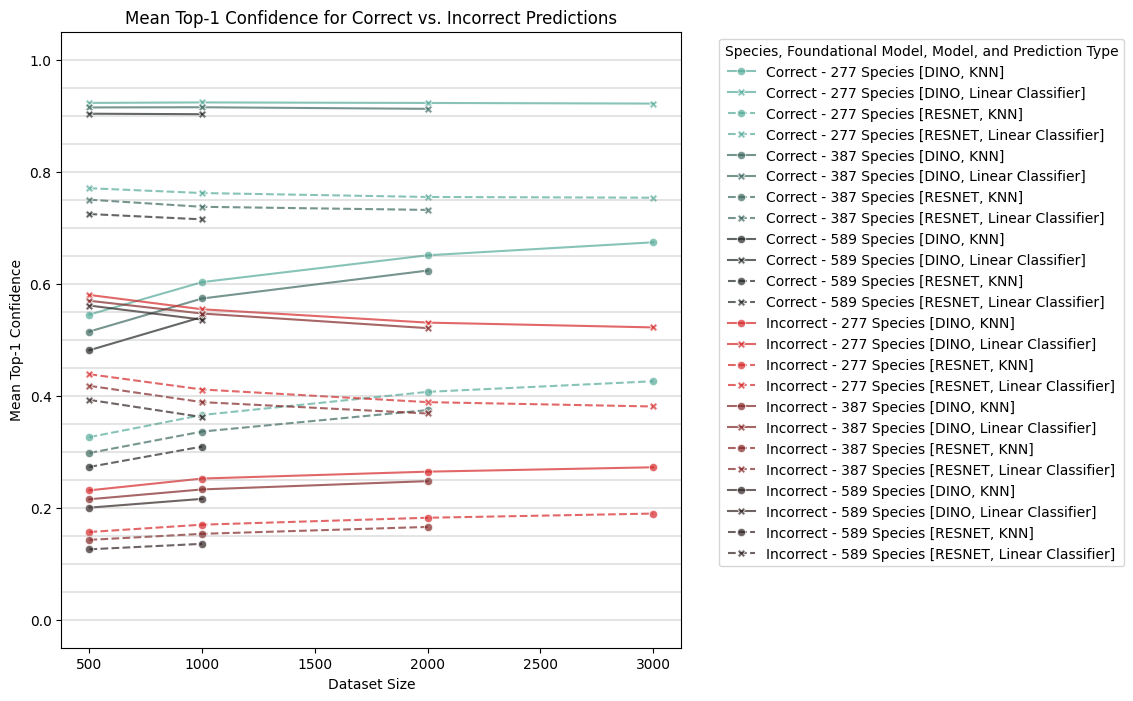

In [ ]:
# Add a column to indicate whether the prediction is correct
confidences_csv['Correct'] = confidences_csv['Label'] == confidences_csv['PredictedLabel']

# Compute mean Top-1 confidence for correct and incorrect classifications
mean_confidence_correct = confidences_csv[confidences_csv['Correct']].groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Top1_Confidence'].mean().reset_index()
mean_confidence_incorrect = confidences_csv[~confidences_csv['Correct']].groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Top1_Confidence'].mean().reset_index()

# Merge the results into a single DataFrame for plotting
mean_confidence_correct['Type'] = 'Correct'
mean_confidence_incorrect['Type'] = 'Incorrect'
mean_confidence_combined = pd.concat([mean_confidence_correct, mean_confidence_incorrect])

# Define markers and linestyles for each combination of foundational model and model
markers = {
    ('dino', 'KNN'): ('o', '-'),
    ('dino', 'Linear Classifier'): ('X', '-'),
    ('resnet', 'KNN'): ('o', '--'),
    ('resnet', 'Linear Classifier'): ('X', '--')
}

# Define darker color palettes for correct (dark green) and incorrect (dark red) predictions
correct_palette = sns.color_palette("dark:#5A9_r", len(mean_confidence_combined['Species'].unique()))
incorrect_palette = sns.color_palette("dark:#D62728_r", len(mean_confidence_combined['Species'].unique()))

# Create a dictionary to store colors for each species and type
species_colors = {}
for i, species in enumerate(mean_confidence_combined['Species'].unique()):
    species_colors[(species, 'Correct')] = correct_palette[i % len(correct_palette)]
    species_colors[(species, 'Incorrect')] = incorrect_palette[i % len(incorrect_palette)]

# Plot the mean Top-1 confidence for correct and incorrect classifications against dataset size
plt.figure(figsize=(8, 8))
for prediction_type in ['Correct', 'Incorrect']:
    for species in mean_confidence_combined['Species'].unique():
        for (fm, model), (marker, linestyle) in markers.items():
            species_subset = mean_confidence_combined[(mean_confidence_combined['FoundationalModel'] == fm) & 
                                                      (mean_confidence_combined['Model'] == model) & 
                                                      (mean_confidence_combined['Species'] == species) & 
                                                      (mean_confidence_combined['Type'] == prediction_type)]
            label = f"{prediction_type} - {species} Species [{fm.upper()}, {model}]"
            sns.lineplot(x='Samples', y='Top1_Confidence', data=species_subset, marker=marker, linestyle=linestyle, 
                         color=species_colors[(species, prediction_type)], alpha=0.7, label=label)

# Add horizontal lines
for y in range(0, 101, 5):
    plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)
    
plt.title('Mean Top-1 Confidence for Correct vs. Incorrect Predictions')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Top-1 Confidence')
plt.legend(title='Species, Foundational Model, Model, and Prediction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Mean Confidence Gap Between Top-1 and Top-2 Predictions
Measures model uncertainty

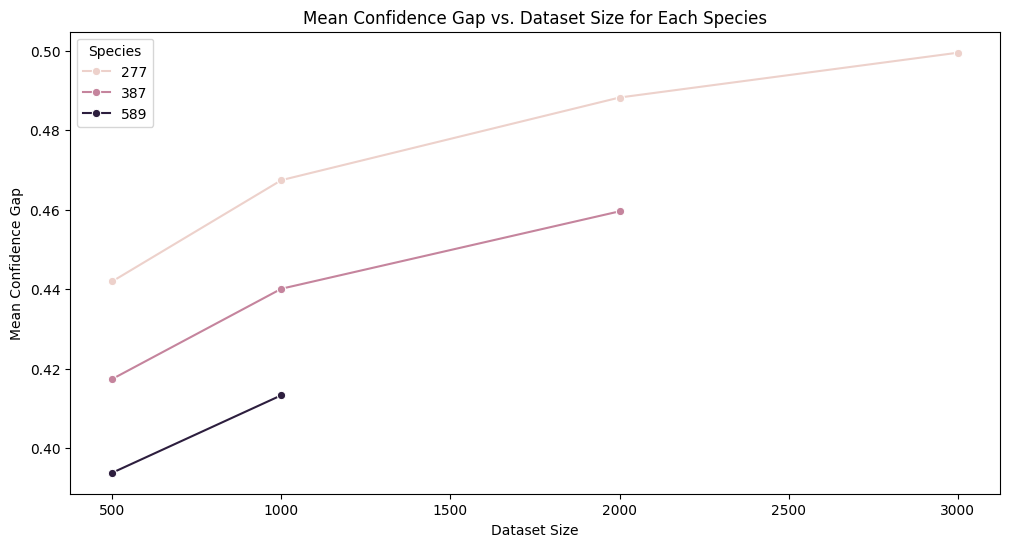

Species  Samples  Confidence_Gap
0      277     3000        0.499489
1      277     2000        0.488224
2      277     1000        0.467439
3      387     2000        0.459600
4      277      500        0.441989
5      387     1000        0.440130
6      387      500        0.417438
7      589     1000        0.413346
8      589      500        0.393858

In [ ]:

# Compute the mean confidence gap for each species and sample size
mean_confidence_gap = confidences_csv.groupby(['Species', 'Samples'])['Confidence_Gap'].mean().reset_index()

# Plot species and sample size vs. mean confidence gap
plt.figure(figsize=(12, 6))
sns.lineplot(x='Samples', y='Confidence_Gap', hue='Species', data=mean_confidence_gap, marker='o')
plt.title('Mean Confidence Gap vs. Dataset Size for Each Species')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Confidence Gap')
plt.legend(title='Species')
plt.show()

mean_confidence_gap.sort_values(by='Confidence_Gap', ascending=False).reset_index(drop=True)

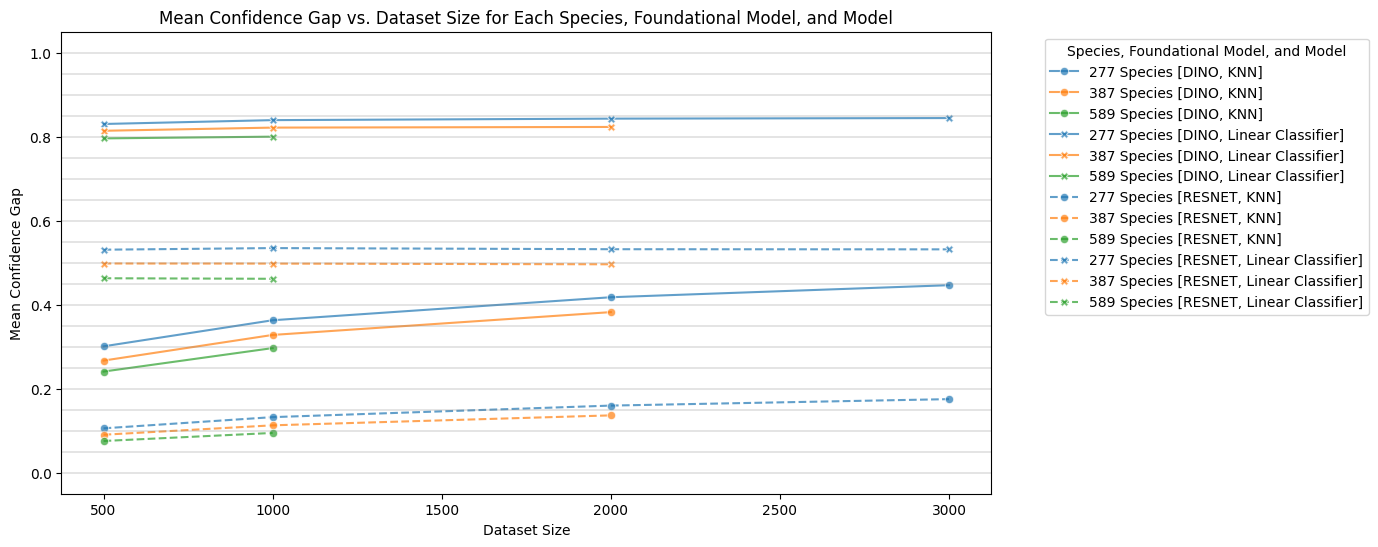

Species  Samples FoundationalModel              Model  Confidence_Gap
0       277     3000              dino  Linear Classifier        0.844422
1       277     2000              dino  Linear Classifier        0.843076
2       277     1000              dino  Linear Classifier        0.839514
3       277      500              dino  Linear Classifier        0.830328
4       387     2000              dino  Linear Classifier        0.823259
5       387     1000              dino  Linear Classifier        0.821706
6       387      500              dino  Linear Classifier        0.814158
7       589     1000              dino  Linear Classifier        0.800157
8       589      500              dino  Linear Classifier        0.796029
9       277     1000            resnet  Linear Classifier        0.534851
10      277     2000            resnet  Linear Classifier        0.532165
11      277     3000            resnet  Linear Classifier        0.531833
12      277      500            resnet  Linear Classifier        0.531024
13      387      500            resnet  Linear Classifier        0.498146
14      387     1000            resnet  Linear Classifier        0.497911
15      387     2000            resnet  Linear Classifier        0.496215
16      589      500            resnet  Linear Classifier        0.463020
17      589     1000            resnet  Linear Classifier        0.461748
18      277     3000              dino                KNN        0.446490
19      277     2000              dino                KNN        0.417809
20      387     2000              dino                KNN        0.382383
21      277     1000              dino                KNN        0.363030
22      387     1000              dino                KNN        0.328050
23      277      500              dino                KNN        0.300916
24      589     1000              dino                KNN        0.296748
25      387      500              dino                KNN        0.266999
26      589      500              dino                KNN        0.240849
27      277     3000            resnet                KNN        0.175211
28      277     2000            resnet                KNN        0.159846
29      387     2000            resnet                KNN        0.136542
30      277     1000            resnet                KNN        0.132363
31      387     1000            resnet                KNN        0.112852
32      277      500            resnet                KNN        0.105689
33      589     1000            resnet                KNN        0.094732
34      387      500            resnet                KNN        0.090448
35      589      500            resnet                KNN        0.075535

In [ ]:
import warnings

warnings.filterwarnings('ignore')

mean_confidence_gap = confidences_csv.groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Confidence_Gap'].mean().reset_index()

# Define markers for each combination of foundational model and model
markers = {
    ('dino', 'KNN'): ('o', '-'),
    ('dino', 'Linear Classifier'): ('X', '-'),
    ('resnet', 'KNN'): ('o','--'),
    ('resnet', 'Linear Classifier'): ('X', '--')
}

# Define a high contrast color palette
palette = sns.color_palette("tab10")

# Create a dictionary to store colors for each species
species_colors = {species: palette[i % len(palette)] for i, species in enumerate(mean_confidence_gap['Species'].unique())}

# Plot species, sample size, foundational model, and model vs. mean confidence gap
plt.figure(figsize=(12, 6))
for (fm, model), (marker, linestyle) in markers.items():
    subset = mean_confidence_gap[(mean_confidence_gap['FoundationalModel'] == fm) & (mean_confidence_gap['Model'] == model)]
    for species in subset['Species'].unique():
        species_subset = subset[subset['Species'] == species]
        label = f"{species} Species [{fm.upper()}, {model}]"
        sns.lineplot(x='Samples', y='Confidence_Gap', data=species_subset, marker=marker, linestyle=linestyle, color=species_colors[species], alpha=0.7, label=label)

# Add horizontal lines
for y in range(0, 101, 5):
    plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)

plt.title('Mean Confidence Gap vs. Dataset Size for Each Species, Foundational Model, and Model')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Confidence Gap')
plt.legend(title='Species, Foundational Model, and Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

mean_confidence_gap.sort_values(by='Confidence_Gap', ascending=False).reset_index(drop=True)

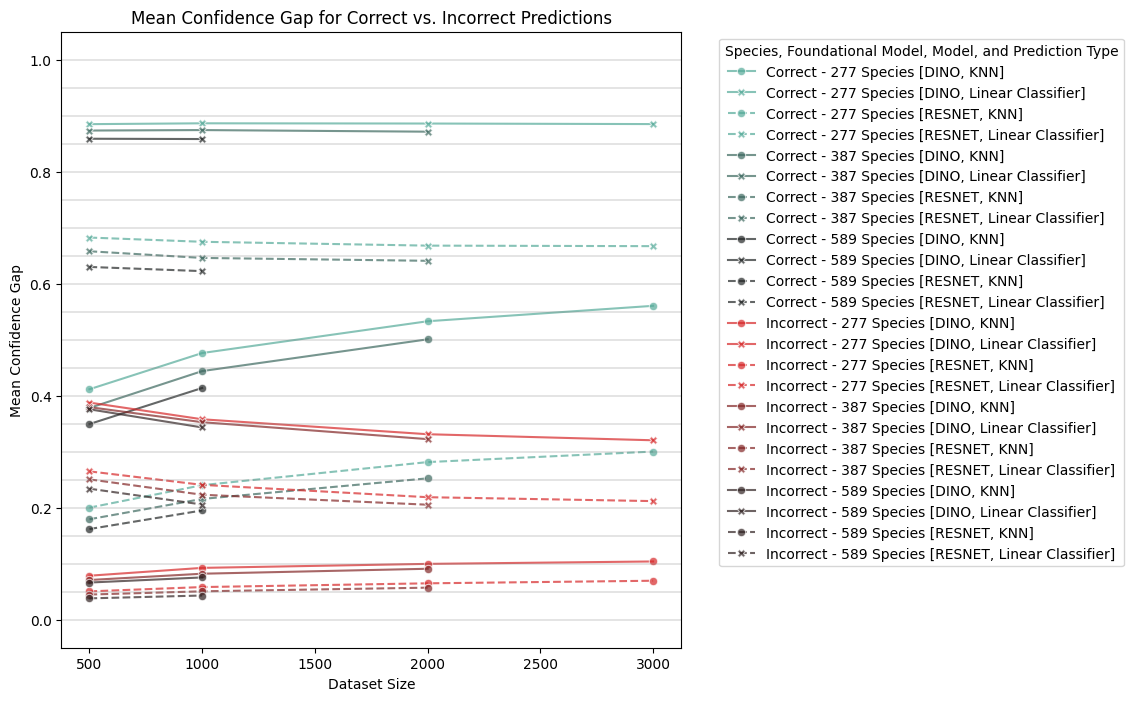

In [ ]:
# Compute mean confidence gap for correct and incorrect classifications
mean_confidence_gap_correct = confidences_csv[confidences_csv['Correct']].groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Confidence_Gap'].mean().reset_index()
mean_confidence_gap_incorrect = confidences_csv[~confidences_csv['Correct']].groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Confidence_Gap'].mean().reset_index()

# Merge the results into a single DataFrame for plotting
mean_confidence_gap_correct['Type'] = 'Correct'
mean_confidence_gap_incorrect['Type'] = 'Incorrect'
mean_confidence_gap_combined = pd.concat([mean_confidence_gap_correct, mean_confidence_gap_incorrect])

# Define markers and linestyles for each combination of foundational model and model
markers = {
    ('dino', 'KNN'): ('o', '-'),
    ('dino', 'Linear Classifier'): ('X', '-'),
    ('resnet', 'KNN'): ('o', '--'),
    ('resnet', 'Linear Classifier'): ('X', '--')
}

# Define darker color palettes for correct (dark green) and incorrect (dark red) predictions
correct_palette = sns.color_palette("dark:#5A9_r", len(mean_confidence_gap_combined['Species'].unique()))
incorrect_palette = sns.color_palette("dark:#D62728_r", len(mean_confidence_gap_combined['Species'].unique()))

# Create a dictionary to store colors for each species and type
species_colors = {}
for i, species in enumerate(mean_confidence_gap_combined['Species'].unique()):
    species_colors[(species, 'Correct')] = correct_palette[i % len(correct_palette)]
    species_colors[(species, 'Incorrect')] = incorrect_palette[i % len(incorrect_palette)]

# Plot the mean confidence gap for correct and incorrect classifications against dataset size
plt.figure(figsize=(8, 8))
for prediction_type in ['Correct', 'Incorrect']:
    for species in mean_confidence_gap_combined['Species'].unique():
        for (fm, model), (marker, linestyle) in markers.items():
            species_subset = mean_confidence_gap_combined[(mean_confidence_gap_combined['FoundationalModel'] == fm) & 
                                                          (mean_confidence_gap_combined['Model'] == model) & 
                                                          (mean_confidence_gap_combined['Species'] == species) & 
                                                          (mean_confidence_gap_combined['Type'] == prediction_type)]
            label = f"{prediction_type} - {species} Species [{fm.upper()}, {model}]"
            sns.lineplot(x='Samples', y='Confidence_Gap', data=species_subset, marker=marker, linestyle=linestyle, 
                         color=species_colors[(species, prediction_type)], alpha=0.7, label=label)

# Add horizontal lines
for y in range(0, 101, 5):
    plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)
    
plt.title('Mean Confidence Gap for Correct vs. Incorrect Predictions')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Confidence Gap')
plt.legend(title='Species, Foundational Model, Model, and Prediction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 4. Confidence Variability Across Dataset Sizes
Checks if models become more stable with more data.

Compute the standard deviation of Top-1 confidences across all samples for each dataset size.
Plot dataset size vs. confidence standard deviation.

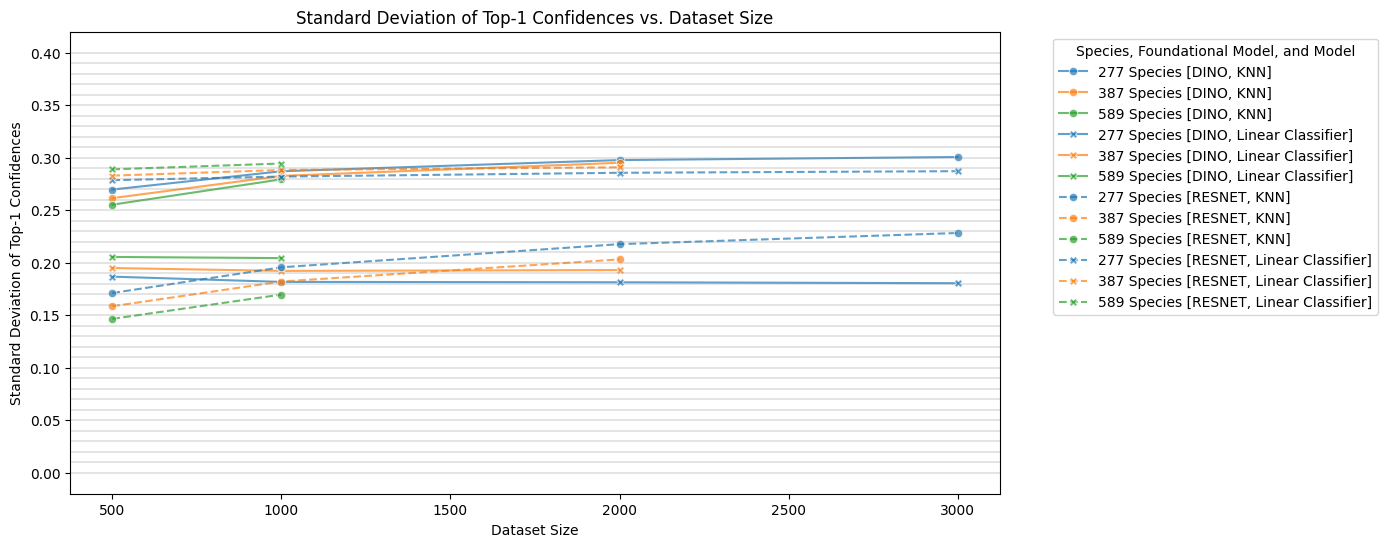

In [ ]:
# Compute the standard deviation of Top-1 confidences for each dataset size, species, foundational model, and model
std_top1_confidences = confidences_csv.groupby(['Species', 'Samples', 'FoundationalModel', 'Model'])['Top1_Confidence'].std().reset_index()

# Define markers for each combination of foundational model and model
markers = {
    ('dino', 'KNN'): ('o', '-'),
    ('dino', 'Linear Classifier'): ('X', '-'),
    ('resnet', 'KNN'): ('o', '--'),
    ('resnet', 'Linear Classifier'): ('X', '--')
}

# Define a high contrast color palette
palette = sns.color_palette("tab10")

# Create a dictionary to store colors for each species
species_colors = {species: palette[i % len(palette)] for i, species in enumerate(std_top1_confidences['Species'].unique())}

# Plot dataset size, species, foundational model, and model vs. confidence standard deviation
plt.figure(figsize=(12, 6))
for (fm, model), (marker, linestyle) in markers.items():
    subset = std_top1_confidences[(std_top1_confidences['FoundationalModel'] == fm) & (std_top1_confidences['Model'] == model)]
    for species in subset['Species'].unique():
        species_subset = subset[subset['Species'] == species]
        label = f"{species} Species [{fm.upper()}, {model}]"
        sns.lineplot(x='Samples', y='Top1_Confidence', data=species_subset, marker=marker, linestyle=linestyle, color=species_colors[species], alpha=0.7, label=label)

# Add horizontal lines
for y in range(0, 41, 1):
    plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)

plt.title('Standard Deviation of Top-1 Confidences vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Standard Deviation of Top-1 Confidences')
plt.legend(title='Species, Foundational Model, and Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# confidences_csv.head(5)

### Class analysis

In [ ]:
# class accuracies

class_accuracies = confidences_csv.groupby('Label')[['Correct', 'Top1_Confidence', 'Confidence_Gap']].mean()
class_accuracies['SampleAmount'] = confidences_csv['Label'].value_counts()

# classes which get wrongly predicted mostly
class_accuracies_least_correct = class_accuracies.sort_values(by='Correct').reset_index()

# classes which probably are mostly confused
class_accuracies_smallest_gap = class_accuracies.sort_values(by='Confidence_Gap').reset_index()


class_accuracies_smallest_gap.head(5)

Label   Correct  Top1_Confidence  Confidence_Gap  SampleAmount
0     99  0.353333         0.324473        0.178792          1200
1    486  0.293280         0.366585        0.185802          9196
2    271  0.358250         0.373433        0.200176          4000
3    475  0.297391         0.417212        0.205262          9200
4    272  0.378000         0.373307        0.211236          4000

In [ ]:
mostly_confused_labels = class_accuracies_least_correct[class_accuracies_least_correct['Correct'] < 0.5]['Label'].values
print(len(mostly_confused_labels))

60


In [ ]:
# Analysis of worst class, 7% drop in accuracy to second worst for class 256

class_to_analyze = 256

wrong_predictions = confidences_csv[(confidences_csv['Label'] == class_to_analyze) & (confidences_csv['Correct'] == False)]['PredictedLabel'].value_counts().sort_values(ascending=False).reset_index()
wrong_predictions.head(5)

PredictedLabel  count
0             255    224
1             259     76
2             250     73
3             258     72
4             253     57

In [ ]:
# # Compute the confusion matrix
# confusion_matrix = pd.crosstab(confidences_csv[confidences_csv['Label'].isin(mostly_confused_labels)], confidences_csv[confidences_csv['PredictedLabel'].isin(mostly_confused_labels)])

# # Number of species
# num_species = len(unique_species)

# # Compute the expected confusion rate
# expected_confusion_rate = 1 / (num_species - 1)

# # Compute the normalized confusion score
# normalized_confusion = confusion_matrix / expected_confusion_rate

# # Display the normalized confusion matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(normalized_confusion, cmap='viridis')
# plt.title('Normalized Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

Actual species:
Eupithecia spec. 4883241740_86654223.jpg


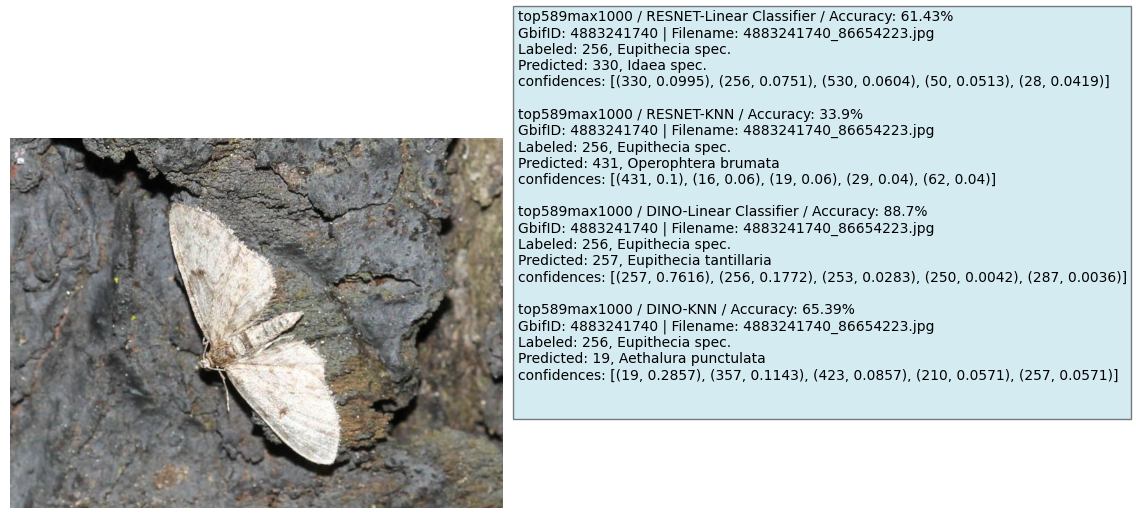



Wrong predictions:
Eupithecia oxycedrata 4881370136_87361092.jpg


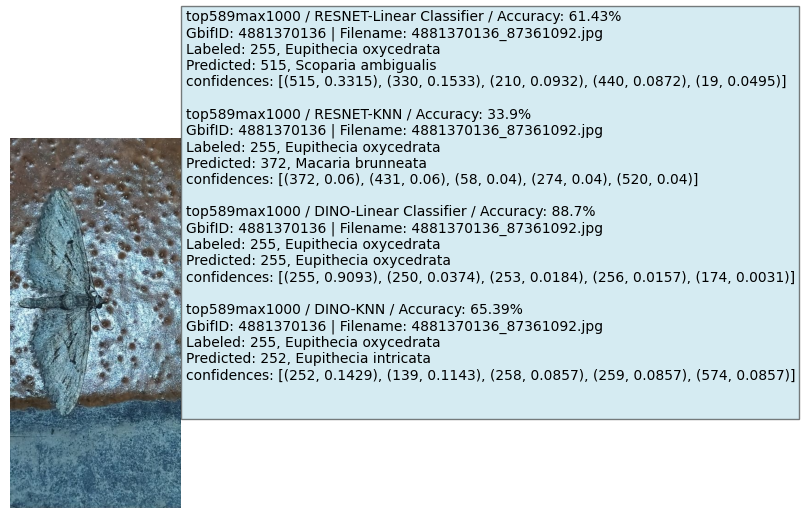

Eupithecia vulgata 1976898040_8716009.jpg


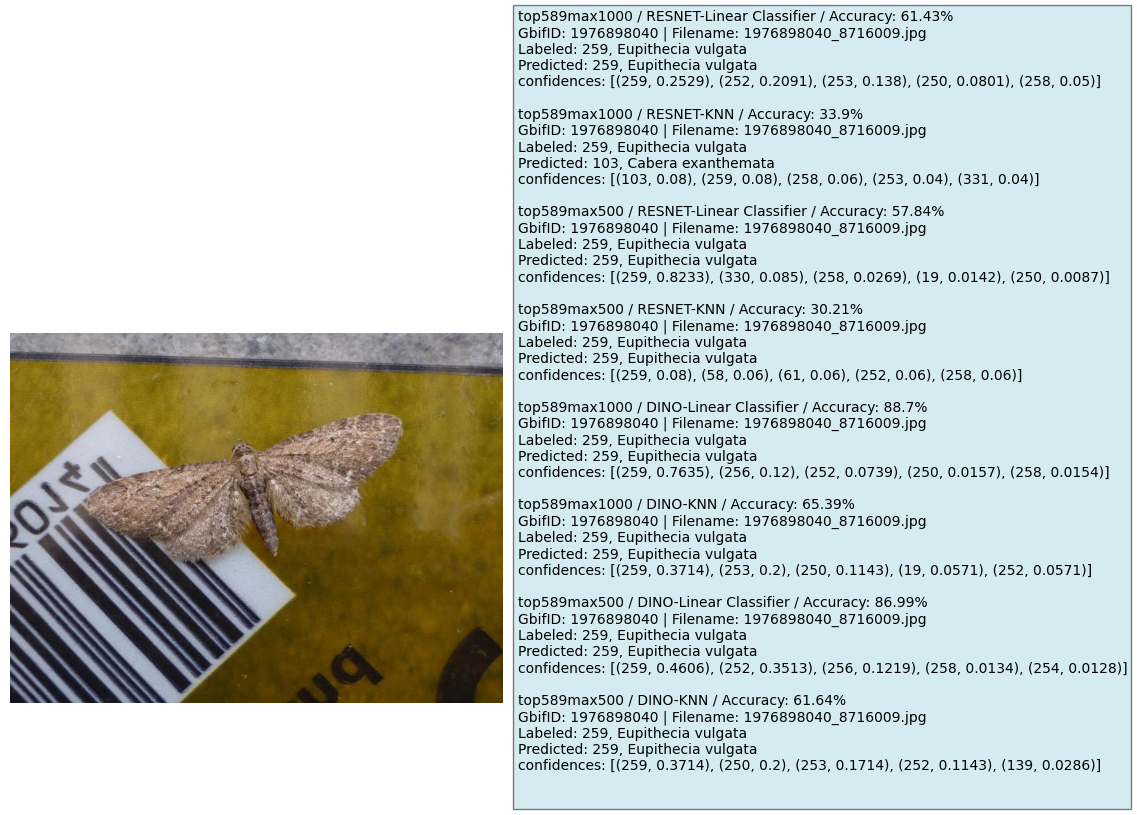

Eupithecia abbreviata 4889032506_86157764.jpg


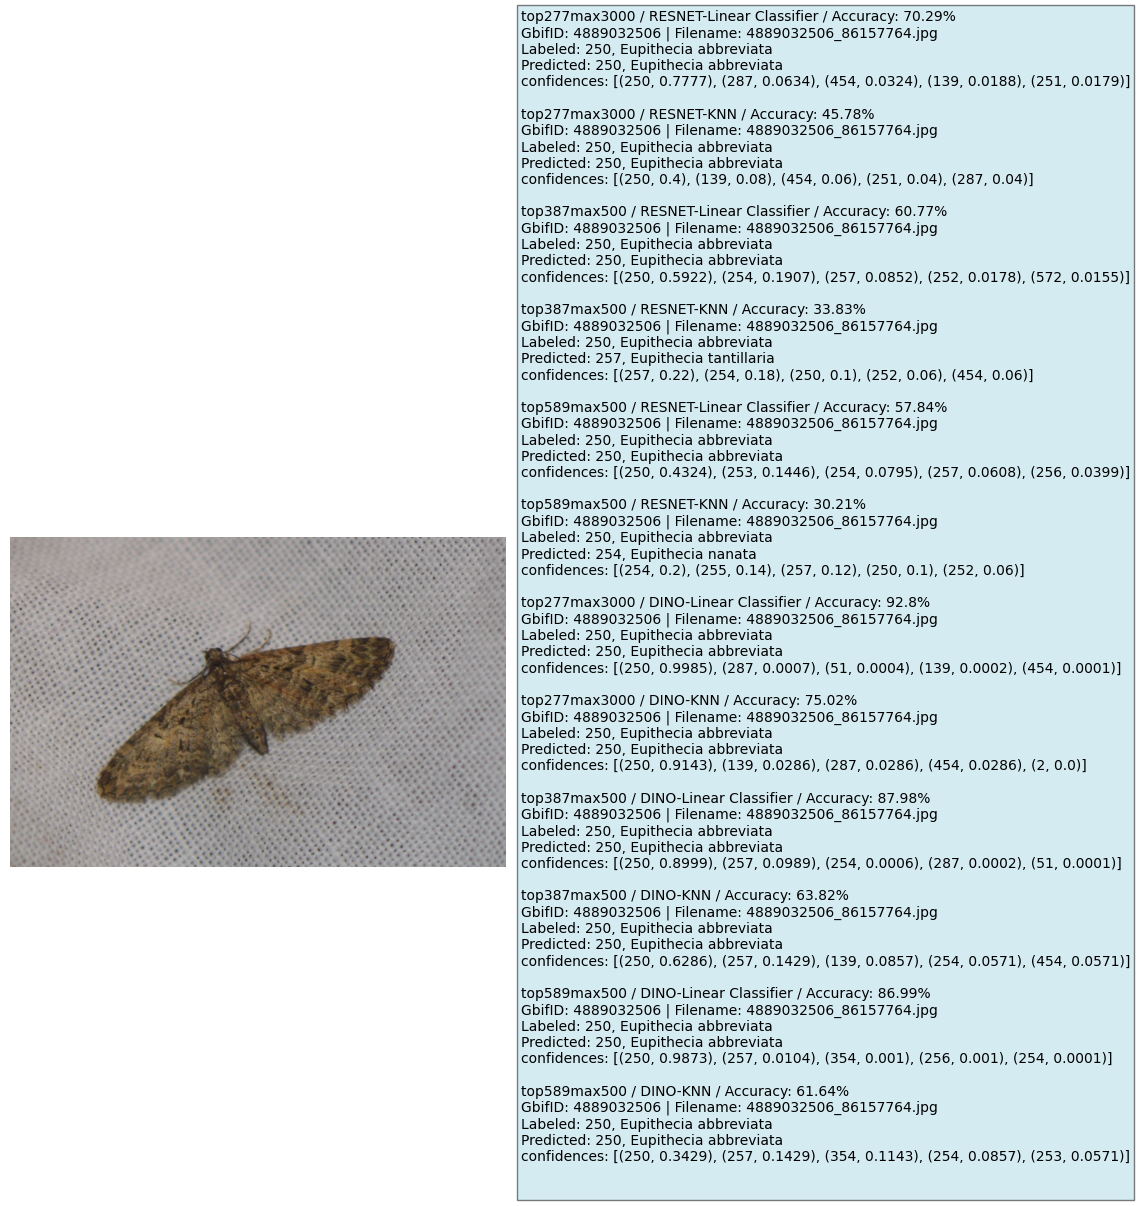

In [ ]:
print('Actual species:')
gbifid_example = get_gbifids_for_class(class_to_analyze, confidences_csv)
show_sample_by_id(gbifid_example[0], confidences_csv)


top5prediction_failures = list(wrong_predictions['PredictedLabel'])[0:3]

print('\n\nWrong predictions:')
for f in top5prediction_failures:
    gbifid_example = get_gbifids_for_class(f, confidences_csv)
    show_sample_by_id(gbifid_example[0], confidences_csv)


### Class-Specific Confidence Trends
Even with an increase of data the confidences stay the same


In [ ]:
fm = 'resnet'
clf = 'Linear Classifier'

mean_confidence_per_species = confidences_csv[(confidences_csv['FoundationalModel'] == fm) & (confidences_csv['Model'] == clf)].groupby(['Species', 'Samples','Label'])[['Correct', 'Top1_Confidence', 'Confidence_Gap']].mean().sort_values(by='Top1_Confidence').reset_index()

#mean_confidence_per_species = confidences_csv.groupby(['Species', 'Samples','Label'])[['Correct', 'Top1_Confidence', 'Confidence_Gap']].mean().sort_values(by='Top1_Confidence').reset_index()
mean_confidence_per_species.head(5)
# table sorted after top1 confidence, shows lowest confidance classes for dataset-configs per label

Species  Samples  Label  Correct  Top1_Confidence  Confidence_Gap
0      589     1000    579    0.260         0.296814        0.168303
1      589     1000    390    0.165         0.300102        0.176762
2      387     1000    390    0.230         0.309495        0.167883
3      589      500    390    0.150         0.318175        0.180737
4      387     2000    390    0.245         0.325799        0.189744

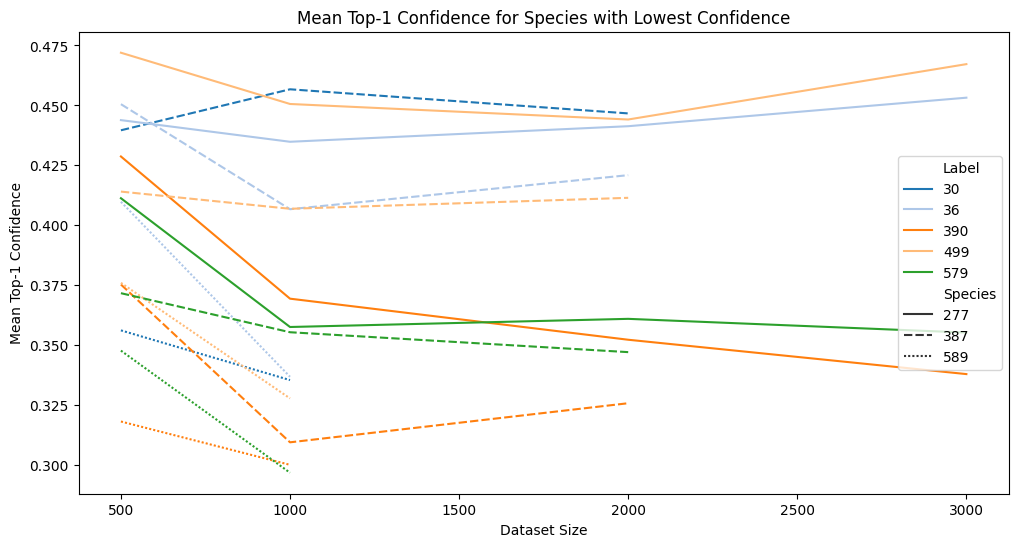

In [ ]:
# Filter the top 10 species with the least top1 confidence grouped after species and samples
mean_confidence_per_species_top10 = mean_confidence_per_species[mean_confidence_per_species['Label'].isin(mean_confidence_per_species['Label'].unique()[0:5])]

# Define a high contrast color palette
palette = sns.color_palette("tab20", n_colors=10)

# Plot the mean Top-1 confidence for the selected species against dataset size
plt.figure(figsize=(12, 6))
sns.lineplot(x='Samples', y='Top1_Confidence', hue='Label', style='Species', data=mean_confidence_per_species_top10, markers=False, dashes=True, palette=palette)

# for y in range(30, 45, 1):
#     plt.axhline(y=y/100, color='gray', linestyle='-', linewidth=0.3)


# TODO: Normalisieren der confidaences zur anzahl der klassen
# TODO: Correlation matrix pro datensatz

plt.title('Mean Top-1 Confidence for Species with Lowest Confidence')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Top-1 Confidence')
plt.legend()
plt.show()

### Further Tests?

- compare IDENTICAL samples across multiple variations
- analyze specific samples?